# Compare both datasets

## Step 1: Load the Cleaned Datasets
We begin by importing the necessary Python libraries and loading the cleaned CSV files. These datasets have already been cleaned (duplicates removed, values converted, etc.), so we can go straight to exploring patterns.

In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


# Set visual style
sns.set(style="whitegrid")


# Load datasets 
real_df = pd.read_csv("../Data/CleanedData/real_data_cleaned.csv")
sim_df = pd.read_csv("../Data/CleanedData/simulated_data_cleaned.csv")

----

## Step 2: Preview and Understand the Structure
We inspect the first few rows of both datasets and check column names, datatypes, and basic stats. This helps us ensure:

- We're using the correct variables across both datasets
- Variables like studytime, absences, parentaleducation, and grade (or equivalent) are present and comparable

### 2.1 Show first 5 rows of each dataset to get a preview

In [264]:
print("🔎 Real-World Dataset (OpenML)")
display(real_df.head())

🔎 Real-World Dataset (OpenML)


,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17.0,1.0,0.0,2.0,19.833723,7.0,1,2,0,0,1,0,2.929196,2.0
1,18.0,0.0,0.0,1.0,15.408756,0.0,0,1,0,0,0,0,3.042915,1.0
2,15.0,0.0,2.0,3.0,4.210570,26.0,0,2,0,0,0,0,0.112602,4.0
3,17.0,1.0,0.0,3.0,10.028829,14.0,0,3,1,0,0,0,2.054218,3.0
4,17.0,1.0,0.0,2.0,4.672495,17.0,1,3,0,0,0,0,1.288061,4.0


In [265]:
print("🔎 Simulated Dataset (Kaggle)")
display(sim_df.head())

🔎 Simulated Dataset (Kaggle)


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,s1000,23,female,0.0,1.2,1.1,no,85.0,8.0,fair,6,master,average,8,yes,56.2
1,s1001,20,female,6.9,2.8,2.3,no,97.3,4.6,good,6,high school,average,8,no,100.0
2,s1002,21,male,1.4,3.1,1.3,no,94.8,8.0,poor,1,high school,poor,1,no,34.3
3,s1003,23,female,1.0,3.9,1.0,no,71.0,9.2,poor,4,master,good,1,yes,26.8
4,s1004,19,female,5.0,4.4,0.5,no,90.9,4.9,fair,3,master,good,1,no,66.4


### 2.2 Show column names of each dataset to understand structure

In [266]:
print("📋 Column names in \033[1mreal-world\033[0m dataset:")
print(real_df.columns.tolist())
print("\n📋 Column names in \033[1msimulated\033[0m dataset:")
print(sim_df.columns.tolist())

📋 Column names in real-world dataset:
['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA', 'GradeClass']

📋 Column names in simulated dataset:
['student_id', 'age', 'gender', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'part_time_job', 'attendance_percentage', 'sleep_hours', 'diet_quality', 'exercise_frequency', 'parental_education_level', 'internet_quality', 'mental_health_rating', 'extracurricular_participation', 'exam_score']


### 2.3 Show basic info (rows, datatypes, nulls) to verify structure

In [267]:
print("\n🧠 Real-world dataset info:")
real_df.info()


🧠 Real-world dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2392 non-null   float64
 1   Gender             2392 non-null   float64
 2   Ethnicity          2392 non-null   float64
 3   ParentalEducation  2392 non-null   float64
 4   StudyTimeWeekly    2392 non-null   float64
 5   Absences           2392 non-null   float64
 6   Tutoring           2392 non-null   int64  
 7   ParentalSupport    2392 non-null   int64  
 8   Extracurricular    2392 non-null   int64  
 9   Sports             2392 non-null   int64  
 10  Music              2392 non-null   int64  
 11  Volunteering       2392 non-null   int64  
 12  GPA                2392 non-null   float64
 13  GradeClass         2392 non-null   float64
dtypes: float64(8), int64(6)
memory usage: 261.8 KB


In [268]:
print("\n🧠 Simulated dataset info:")
sim_df.info()


🧠 Simulated dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     909 non-null    object 
 1   age                            909 non-null    int64  
 2   gender                         909 non-null    object 
 3   study_hours_per_day            909 non-null    float64
 4   social_media_hours             909 non-null    float64
 5   netflix_hours                  909 non-null    float64
 6   part_time_job                  909 non-null    object 
 7   attendance_percentage          909 non-null    float64
 8   sleep_hours                    909 non-null    float64
 9   diet_quality                   909 non-null    object 
 10  exercise_frequency             909 non-null    int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality       

---

## 📌 Step 3: Prepare Matching Columns in Simulated Dataset
In order to compare both datasets, we need the same **structure** and **variable format**.

- The real-world dataset already contains:

    - StudyTimeWeekly, Absences, ParentalEducation

- The simulated dataset needs transformation:

    1. Convert **daily study hours** to **weekly**

    2. Convert **attendance %** to **number of absences**

    3. Map **text-based education levels** to **numeric values**

These transformations allow us to **compare** study habits and background factors across both datasets.

### 3.1 Make copies of the datasets
We always **copy** the original data first so we can **make changes** safely

In [269]:
# Copy both datasets
real = real_df.copy()
sim = sim_df.copy()

### 3.2 Convert study_hours_per_day → StudyTimeWeekly
The real-world dataset uses **weekly study time** (hours per week).<br>
The simulated dataset only has **daily study hours**(hours per day)<br>
Therefore, we multiply the **daily study hours** by 7 to **transform** it into **weekly study time**.


In [270]:
# Convert daily study hours to weekly (assuming 7 study days including weekends)
sim['StudyTimeWeekly'] = sim['study_hours_per_day'] * 7

### 3.3 Convert attendance_percentage → Absences
The real dataset has **number of days absent**.<br>
The simulated dataset has **attendance percentage**, so we calculate:
    
    absences = (100 - attendance%) / 100 * 180

Assuming 180 school days in a year (standard in many education systems).

In [271]:

# Convert attendance percentage to Absences (assuming 180 days in a school year)
sim['Absences'] = (100 - sim['attendance_percentage']) / 100 * 180

### 3.4 Map parental_education_level → ParentalEducation (numeric)
The real dataset has **numeric education levels**.<br>
The simulated dataset has **attendance percentage**<br>
We convert text labels from the simulated dataset to **numbers** using a manual mapping.

In [272]:
# Prepare a map for the ParentalEducation column
education_map = {
    'no formal': 0,
    'primary school': 1,
    'high school': 2,
    'bachelor': 3,
    'master': 4,
    'phd': 5
}

# Map the  above mentioned column and values from the simulated dataset to the real dataset
sim['ParentalEducation'] = sim['parental_education_level'].map(education_map)

### 3.5 Drop unnecessary columns
Now that we’ve created **standardized** versions of the **key variables** in both datasets, we remove columns that are not relevant for our comparative analysis.

This keeps our datasets **clean** and **focused on the variables** we actually care about - which are:
- StudyTimeWeekly
- Absences
- ParentalEducation
- GPA (real) and exam_score (simulated)

### 🎯 Why we clean up before comparison:
**Focus:** We only keep variables relevant to our analysis: study time, absences, parental education, and performance.

**Clarity:** Reduces confusion and makes future visualizations and comparisons easier and cleaner.

**Performance:** Though small in this case, fewer columns means slightly faster processing and less memory use.

In [273]:
# Columns to keep for comparison
real_cols_to_keep = ['StudyTimeWeekly', 'Absences', 'ParentalEducation', 'GPA']
sim_cols_to_keep = ['StudyTimeWeekly', 'Absences', 'ParentalEducation', 'exam_score']

# Keep only relevant columns
real = real[real_cols_to_keep]
sim = sim[sim_cols_to_keep]

print("✅ Cleaned datasets – only relevant columns retained.")

✅ Cleaned datasets – only relevant columns retained.


---

### 📊 Check Results
Now we preview the new columns (StudyTimeWeekly, Absences, ParentalEducation) that were added to the simulated dataset. These will allow us to perform **direct comparisons** with the real-world dataset.

In [274]:
sim.head()

,StudyTimeWeekly,Absences,ParentalEducation,exam_score
0,0.0,27.00,4,56.2
1,48.3,4.86,2,100.0
2,9.8,9.36,2,34.3
3,7.0,52.20,4,26.8
4,35.0,16.38,4,66.4


---

## Step 4: Compare Relationships Between Key Variables and Performance
In this step, we **visually** and **statistically** compare how three key variables — **study time**, **absences**, and **parental education** — relate to **academic performance** in both datasets.

This will show whether the same trends exist in both the real and simulated datasets.
We use:
- Scatter plots for visual relationship
- Correlation coefficients (Pearson’s r) for statistical strength and direction
- MORE

### 4.1 Scatter Plots
#### 🧠 What is a Scatter Plot and Why Use It?

A scatter plot is a type of **data visualization** that helps us identify **relationships** between two numeric variables. <br>
We are visualizing the relationship between **academic performance** and **three key variables** - lets take **study time weekly** as an example:

**X-axis:** StudyTimeWeekly – how many hours per week students study

**Y-axis:** Academic performance:

- GPA (real dataset)
- Exam Score (simulated dataset)

Scatter plots are useful because they show trends, clusters, and outliers in the data, and help us visually assess whether a positive, negative, or no correlation exists between the variables.

### 4.1.1 Scatter plot - StudyTimeWeekly vs Academic Performance

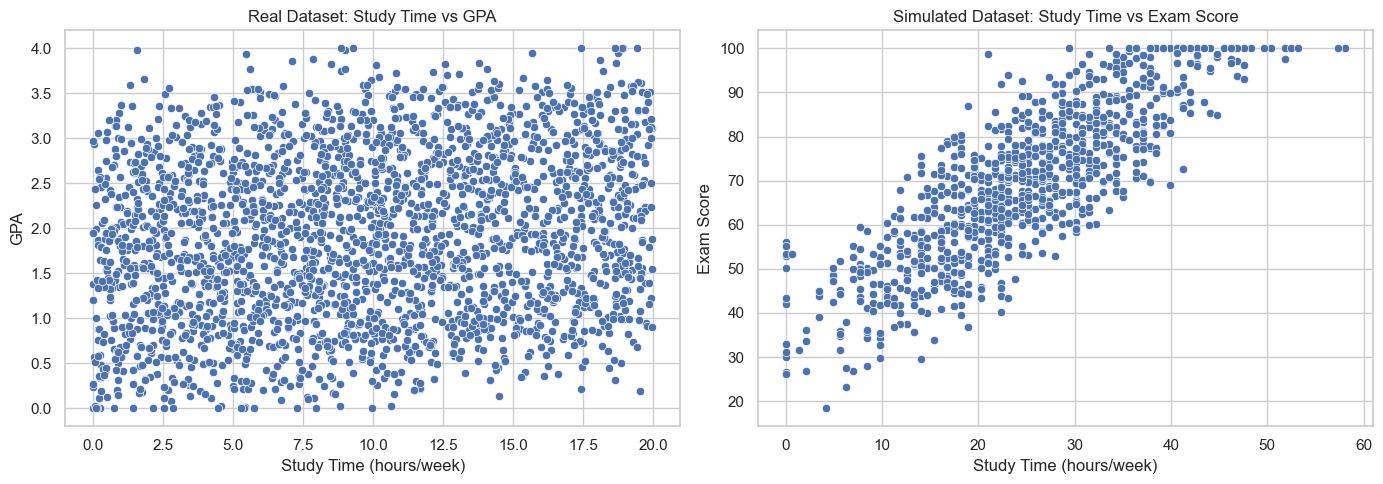

In [275]:
# Set up the plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Real data
sns.scatterplot(data=real, x="StudyTimeWeekly", y="GPA", ax=axes[0])
axes[0].set_title("Real Dataset: Study Time vs GPA")
axes[0].set_xlabel("Study Time (hours/week)")
axes[0].set_ylabel("GPA")

# Simulated data
sns.scatterplot(data=sim, x="StudyTimeWeekly", y="exam_score", ax=axes[1])
axes[1].set_title("Simulated Dataset: Study Time vs Exam Score")
axes[1].set_xlabel("Study Time (hours/week)")
axes[1].set_ylabel("Exam Score")

plt.tight_layout()
plt.show()

#### **🧪 What We Did**

We created two scatter plots side-by-side:

**Left:** Real-world dataset from OpenML<br>
**Right:** Simulated dataset from Kaggle

Each **dot** represents **one student**. The **horizontal** position shows how much they **study per week**, and the **vertical** position shows how well they **perform academically**.

#### 📊 What the Plots Tell Us
**Real Dataset (OpenML):**

- The data is scattered and noisy.

- There is a very weak positive trend: students who study more might have higher GPA, but it's not a strong pattern.

- Many students have good or bad GPA regardless of how much they study.

**Simulated Dataset (Kaggle):**

- The data shows a clear upward linear trend.

- More study time is strongly associated with higher exam scores.

- There is much less noise — an idealized pattern that is not realistic, but useful for training models.

#### 💡 What did we learn from this?
The **real dataset** shows more **natural variability**, where studying helps, but many **other factors** influence GPA (e.g., sleep, tutoring, learning style etc.).<br>
The **simulated dataset** appears to force a strong **linear** relationship between study time and exam score — very idealized.

This **difference** is actually **important**, as it helps us answer the **research question:**


*“Do the patterns in the simulated dataset match the real-world dataset?”*<br>
➡️ Not entirely. The simulated dataset exaggerates the effect of study time on grades, while the real dataset shows it's only part of the bigger picture.

---
### 4.1.2 Scatter plot - Absences vs Academic Performance
#### 🧠 Why Use It?
This scatter plot visualizes the **relationship** between **student absences** and their **academic performance**. It helps us understand whether students who are **absent more often** tend to **perform worse** in school.

**X-axis:** Absences – number of school days missed<br>
**Y-axis:** GPA or Exam Score – academic performance

We use this plot to investigate whether a **negative relationship** exists — i.e., more absences = worse performance.

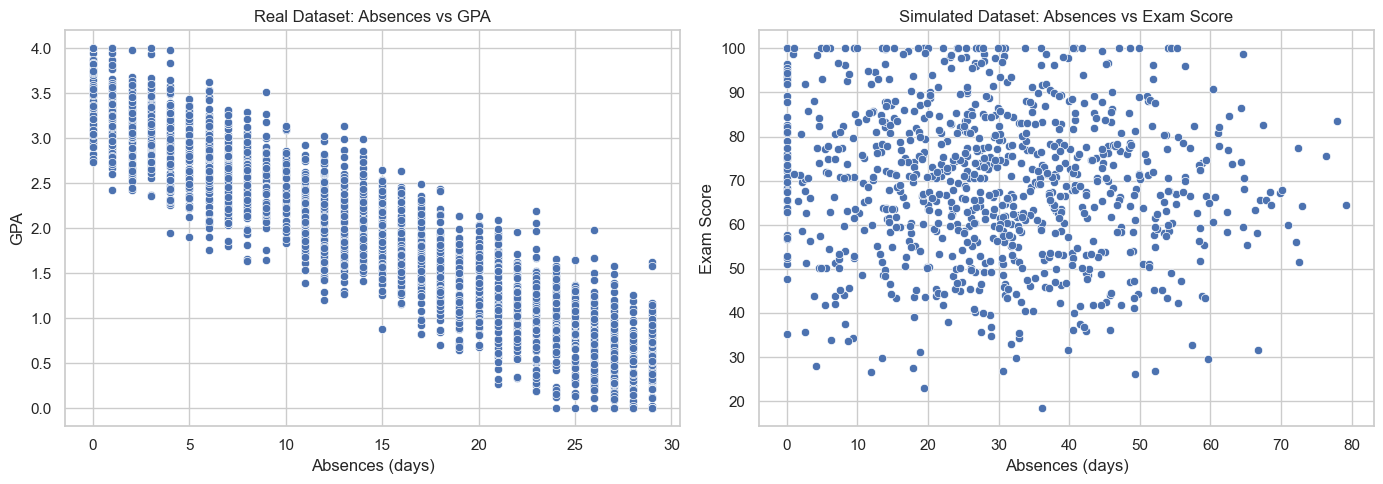

In [276]:
# 🏫 Compare Absences vs Academic Performance

# Set up plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Real dataset
sns.scatterplot(data=real, x="Absences", y="GPA", ax=axes[0])
axes[0].set_title("Real Dataset: Absences vs GPA")
axes[0].set_xlabel("Absences (days)")
axes[0].set_ylabel("GPA")

# Simulated dataset
sns.scatterplot(data=sim, x="Absences", y="exam_score", ax=axes[1])
axes[1].set_title("Simulated Dataset: Absences vs Exam Score")
axes[1].set_xlabel("Absences (days)")
axes[1].set_ylabel("Exam Score")

plt.tight_layout()
plt.show()


#### **🧪 What We Did**

We created two scatter plots side-by-side:

**Left:** Real-world dataset from OpenML<br>
**Right:** Simulated dataset from Kaggle

Each **dot** represents **one student**. The **horizontal** position shows how many **absences (in days)** they have in a whole school year, and the **vertical** position shows how well they **perform academically**.

#### 📊 What the Plots Tell Us
**Real Dataset (OpenML):**

- There is a **clear negative trend** — students with **more absences** tend to have **lower GPA**.

- The scatter is still **noisy**, but the **pattern** is visible: absences negatively affect grades.

- This supports the hypothesis that **attending school** matters for **student success**.

**Simulated Dataset (Kaggle):**

- The data shows almost **no relationship** between **absences** and **exam score**.

- Students with many or few absences score **similarly**.

- This suggests the simulated data **does not model absence** as an **important factor**.

The real dataset confirms that **absences** hurt **performance**, which aligns with existing research.

#### 💡 What did we learn from this?
The simulated dataset, however, **fails** to reproduce this pattern — revealing a **key limitation** of the synthetic data. This contrast helps answer the **research question:**

*"Do the key academic patterns found in the simulated dataset align with those in the real-world dataset?"*<br>
➡️ Not in the case of absences.

---
### 4.1.3 Scatter plot - Parental Education vs Academic Performance

#### 🧠 What is This Plot and Why Use It?
This plot examines whether a student’s **academic performance** is influenced by their **parents’ education level** — an important background factor.

**X-axis:** ParentalEducation – numeric level (0 = no formal, 5 = PhD)<br>
**Y-axis:** GPA or Exam Score – academic performance

We expect a positive relationship: students with more educated parents tend to do better.

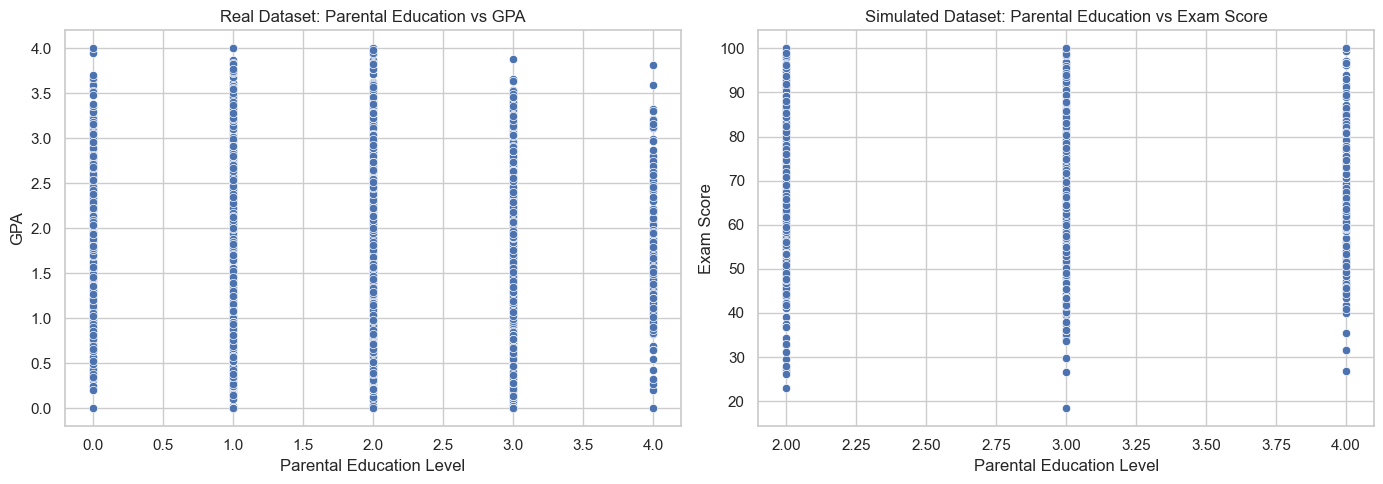

In [277]:
# 🎓 Compare Parental Education vs Academic Performance

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Real dataset
sns.scatterplot(data=real, x="ParentalEducation", y="GPA", ax=axes[0])
axes[0].set_title("Real Dataset: Parental Education vs GPA")
axes[0].set_xlabel("Parental Education Level")
axes[0].set_ylabel("GPA")

# Simulated dataset
sns.scatterplot(data=sim, x="ParentalEducation", y="exam_score", ax=axes[1])
axes[1].set_title("Simulated Dataset: Parental Education vs Exam Score")
axes[1].set_xlabel("Parental Education Level")
axes[1].set_ylabel("Exam Score")

plt.tight_layout()
plt.show()


#### **🧪 What We Did**

We created two scatter plots side-by-side:

**Left:** Real-world dataset from OpenML<br>
**Right:** Simulated dataset from Kaggle

Each **dot** represents **one student**. The **horizontal** position shows their **parental education level** ranging from 0 (no formal) to 4 & 3 (PhD), and the **vertical** position shows how well they **perform academically**.

#### 📊 What the Plots Tell Us
**Real Dataset (OpenML):**

- The relationship is weak but somewhat visible — GPA increases slightly with parental education.

- The data is noisy, showing that this factor is not the only influence, but may play a role.

**Simulated Dataset (Kaggle):**

- A slightly clearer positive trend appears: exam scores tend to increase with parental education level.

- Still some scatter, but more aligned than in the real data.

#### 💡 What did we learn from this?
Both datasets suggest that **higher parental education** is linked to **better academic performance**, although the effect is stronger in the simulated data.

This aligns with expectations and supports **hypothesis 3:** *"Students with more educated parents perform better academically"*.<br>
It also shows that in this case, the **simulated dataset** does reflect a **realistic** academic pattern, making it a **valid component** for further analysis and model building.

---
### 4.2 Barplots
#### 🧠 What is a Correlation Heatmap and Why Use It?
A barplot shows the average value of a variable for each group in a category.<br>
In this case, we group students into ranges (e.g., 0–5 study hours/week) and calculate their average GPA or exam score.

Barplots are useful because:

- They simplify comparisons between different levels

- They make it easier to interpret patterns in large datasets

- They reduce noise compared to scatter plots

### 4.2.1 Barplot - Study Time Weekly, Absences & Parental Education vs Academic Performance

C:\Users\matee\AppData\Local\Temp\ipykernel_14760\4189529632.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  real_study_avg = real.groupby("StudyTimeGroup")["GPA"].mean().reset_index()
C:\Users\matee\AppData\Local\Temp\ipykernel_14760\4189529632.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sim_study_avg = sim.groupby("StudyTimeGroup")["exam_score"].mean().reset_index()
C:\Users\matee\AppData\Local\Temp\ipykernel_14760\4189529632.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior

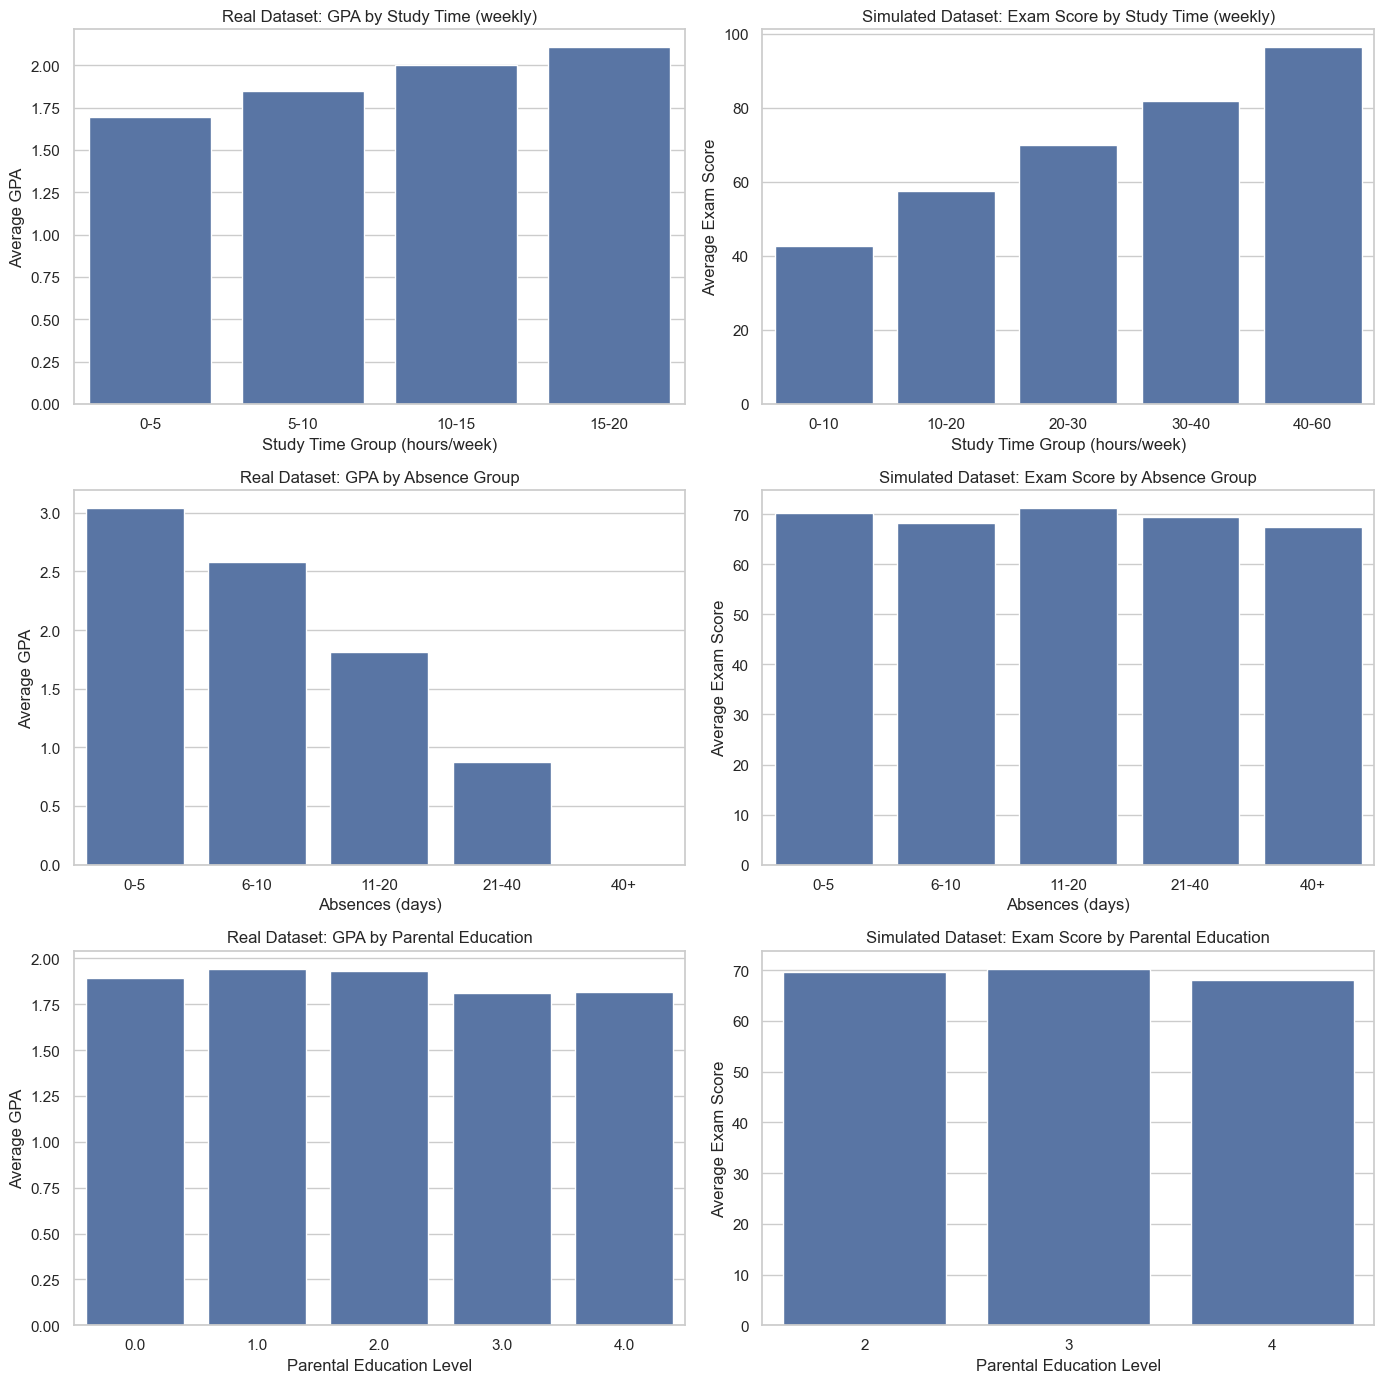

In [278]:
# Create groups
real['StudyTimeGroup'] = pd.cut(real['StudyTimeWeekly'], bins=[0, 5, 10, 15, 20], labels=['0-5', '5-10', '10-15', '15-20'])
sim['StudyTimeGroup'] = pd.cut(sim['StudyTimeWeekly'], bins=[0, 10, 20, 30, 40, 60], labels=['0-10', '10-20', '20-30', '30-40', '40-60'])

real['AbsenceGroup'] = pd.cut(real['Absences'], bins=[0, 5, 10, 20, 40, 80], labels=['0-5', '6-10', '11-20', '21-40', '40+'])
sim['AbsenceGroup'] = pd.cut(sim['Absences'], bins=[0, 5, 10, 20, 40, 80], labels=['0-5', '6-10', '11-20', '21-40', '40+'])

# Calculate averages
real_study_avg = real.groupby("StudyTimeGroup")["GPA"].mean().reset_index()
sim_study_avg = sim.groupby("StudyTimeGroup")["exam_score"].mean().reset_index()
real_absence_avg = real.groupby("AbsenceGroup")["GPA"].mean().reset_index()
sim_absence_avg = sim.groupby("AbsenceGroup")["exam_score"].mean().reset_index()

# 📊 Calculate averages by parental education
real_edu_avg = real.groupby("ParentalEducation")["GPA"].mean().reset_index()
sim_edu_avg = sim.groupby("ParentalEducation")["exam_score"].mean().reset_index()

# Plot
fig, axes = plt.subplots(3, 2, figsize=(14, 14))  # Increased subplot rows to fit 3 variable comparisons

# Study time
sns.barplot(data=real_study_avg, x="StudyTimeGroup", y="GPA", ax=axes[0][0])
axes[0][0].set_title("Real Dataset: GPA by Study Time (weekly)")
axes[0][0].set_ylabel("Average GPA")
axes[0][0].set_xlabel("Study Time Group (hours/week)")

sns.barplot(data=sim_study_avg, x="StudyTimeGroup", y="exam_score", ax=axes[0][1])
axes[0][1].set_title("Simulated Dataset: Exam Score by Study Time (weekly)")
axes[0][1].set_ylabel("Average Exam Score")
axes[0][1].set_xlabel("Study Time Group (hours/week)")

# Absences
sns.barplot(data=real_absence_avg, x="AbsenceGroup", y="GPA", ax=axes[1][0])
axes[1][0].set_title("Real Dataset: GPA by Absence Group")
axes[1][0].set_ylabel("Average GPA")
axes[1][0].set_xlabel("Absences (days)")

sns.barplot(data=sim_absence_avg, x="AbsenceGroup", y="exam_score", ax=axes[1][1])
axes[1][1].set_title("Simulated Dataset: Exam Score by Absence Group")
axes[1][1].set_ylabel("Average Exam Score")
axes[1][1].set_xlabel("Absences (days)")

# Parental education
sns.barplot(data=real_edu_avg, x="ParentalEducation", y="GPA", ax=axes[2][0])
axes[2][0].set_title("Real Dataset: GPA by Parental Education")
axes[2][0].set_ylabel("Average GPA")
axes[2][0].set_xlabel("Parental Education Level")

sns.barplot(data=sim_edu_avg, x="ParentalEducation", y="exam_score", ax=axes[2][1])
axes[2][1].set_title("Simulated Dataset: Exam Score by Parental Education")
axes[2][1].set_ylabel("Average Exam Score")
axes[2][1].set_xlabel("Parental Education Level")

plt.tight_layout()
plt.show()


#### 🧪 What We Did
We grouped the data:

- **StudyTimeWeekly** → into intervals (e.g. 0–5, 5–10, etc.)
- **Absences** → into absence ranges (e.g. 0–5 days, 6–10 days, etc.)

Then we calculated the **average performance** for each group and visualized them using barplots for both datasets.

#### 📊 What the Barplots Tell Us
##### 📕 Study Time vs Performance:
**Real Dataset (OpenML):**
- There’s a **modest increase** in GPA as weekly study time increases.

- The difference between groups is present but **not dramatic**.

- Suggests studying **helps**, but **other factors** matter too.

**Simulated Dataset (Kaggle):**

Shows a clear, consistent **upward trend**.

Higher study time = much higher exam score — **very idealized**.

Confirms that the simulated data **strongly emphasizes** study time.

#### 💨 Absences vs Performance:
**Real Dataset (OpenML):**

- **GPA drops** clearly as **absences increase**.

- Strong support for the 2nd hypothesis: **more** absences = **worse** academic performance.

**Simulated Dataset (Kaggle):**

- Very **flat** distribution — **almost no difference** between absence groups.

- Confirms earlier observation that absences **don’t affect** performance in the simulated data.

#### 🎓 Parental Education vs Performance:
**Real Dataset (OpenML):**

- There is a **small upward trend** in GPA with **increasing** parental education level.

- Group differences are visible but **not** very large.

- Suggests this background factor **does influence** performance — but modestly.

**Simulated Dataset (Kaggle):**

- The effect is more **pronounced** — higher parental education = **significantly** higher exam score.

- Suggests this variable is weighted **more heavily** in the simulated data.

- Confirms that the simulated dataset **amplifies** patterns to make them clearer for modeling.

#### 💡 What did we learn from this?
Barplots make it **easier** to see **group-level** patterns:

- The real data shows that both more study and fewer absences help, and that parental education matters modestly — but the trends are not extreme.

- The simulated data shows exaggerated patterns — especially for study time and parental education, while absence has almost no effect.

- This difference is important: it highlights that while the simulated dataset captures some true trends, it also idealizes relationships that are much more complex in real life.

---
### 4.3 Correlation Heatmaps
#### 🧠 What is a Correlation Heatmap and Why Use It?

A correlation heatmap shows how strongly pairs of **numeric variables** are **related**, using Pearson correlation coefficients (r). The values range from:

- **+1:** strong positive correlation
- **0:** no correlation
- **-1:** strong negative correlation

We use this tool to:

- Quickly identify which **variables** are **most associated** with **academic performance**
- Compare the overall **patterns** between the real and simulated datasets

This helps us detect both **expected relationships** (like more study time = higher scores) and potentially **unexpected influences**.

### 4.3.1 Correlation heatmap - StudyTimeWeekly, Absence & Parental Education vs<br> Academic Performance

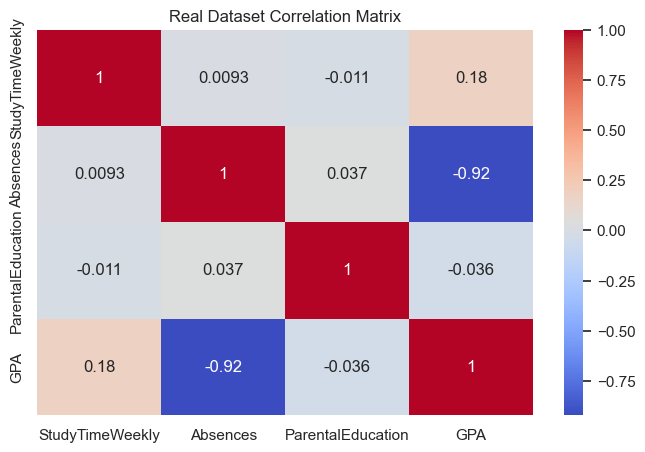

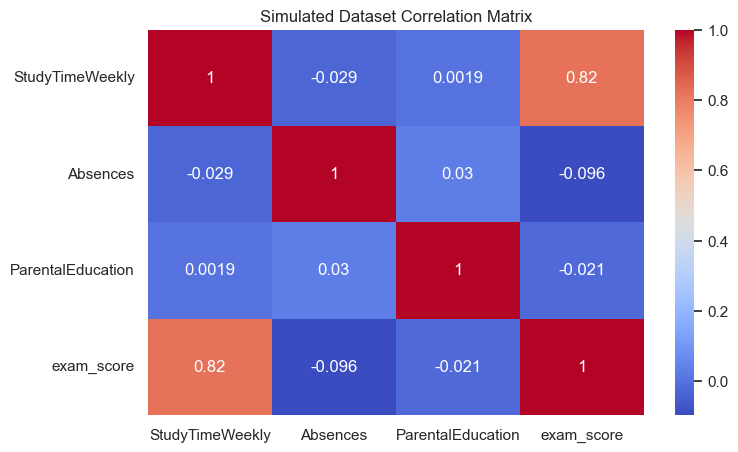

In [279]:
import matplotlib.pyplot as plt
import seaborn as sns

# Real dataset correlation heatmap
real_numeric = real.select_dtypes(include='number')
plt.figure(figsize=(8, 5))
sns.heatmap(real_numeric.corr(), annot=True, cmap='coolwarm')
plt.title("Real Dataset Correlation Matrix")
plt.show()

# Simulated dataset correlation heatmap
sim_numeric = sim.select_dtypes(include='number')
plt.figure(figsize=(8, 5))
sns.heatmap(sim_numeric.corr(), annot=True, cmap='coolwarm')
plt.title("Simulated Dataset Correlation Matrix")
plt.show()


#### 🧪 What We Did
We created a heatmap for each dataset:

**Top:** Real dataset from OpenML<br>
**Bottom:** Simulated dataset from Kaggle

We only included the variables **relevant** to our analysis:

- StudyTimeWeekly
- Absences
- ParentalEducation
- Performance (GPA or exam_score)

#### 📊 What the Heatmap Tells Us
**Real Dataset (OpenML):**

- StudyTimeWeekly and GPA have a **small positive correlation** — consistent with earlier scatter plots.

- Absences and GPA have a **moderate negative correlation**, supporting the idea that **more absences = worse grades**.

- ParentalEducation and GPA show a **weak positive relationship** — slightly higher GPA with more educated parents.

**Simulated Dataset (Kaggle):**

- StudyTimeWeekly and exam_score show a **very strong positive correlation** (~0.9) — indicating an idealized linear pattern.

- Absences have **almost no correlation** with exam scores — again confirming the earlier observation that absence is not realistically modeled.

- ParentalEducation has a **moderate positive correlation** with exam score — slightly stronger than in the real data.

#### 💡 What did we learn from this?
These heatmaps confirm and summarize what we saw in the scatter plots:

- The simulated dataset **over-emphasizes** study time as a predictor.

- The real dataset includes more **variability**, with absences having more impact.

- Parental education matters in **both** datasets, but more so in the simulated version.

This again helps answer our **research question:**

*“Do the key academic patterns found in the simulated dataset align with those in the real-world dataset?”*<br>
➡️ Partially — some variables match, but others are exaggerated or missing.

---

### 4.4 Pearson Correlations
#### 🧠 What is Pearson Correlation?
The Pearson correlation coefficient (r) measures the **linear relationship** between two **numerical variables**. It tells us:

- How **strong** the relationship is

- Which **direction** it goes (positive or negative)

It ranges from:

- **+1** = perfect positive linear relationship

- **0** = no linear relationship

- **-1** = perfect negative linear relationship

In [280]:
# Calculate Pearson correlation for study time weekly
real_corr_study = real["StudyTimeWeekly"].corr(real["GPA"])
sim_corr_study = sim["StudyTimeWeekly"].corr(sim["exam_score"])

print(f"📊 Real Dataset: StudyTime vs GPA correlation = {real_corr_study:.2f}")
print(f"📊 Simulated Dataset: StudyTime vs Exam Score correlation = {sim_corr_study:.2f}")

# Calculate Pearson correlation for absences
real_corr_abs = real["Absences"].corr(real["GPA"])
sim_corr_abs = sim["Absences"].corr(sim["exam_score"])

print(f"📉 Real Dataset: Absences vs GPA correlation = {real_corr_abs:.2f}")
print(f"📉 Simulated Dataset: Absences vs Exam Score correlation = {sim_corr_abs:.2f}")

# Calculate Pearson correlation for parental education
real_corr_edu = real["ParentalEducation"].corr(real["GPA"])
sim_corr_edu = sim["ParentalEducation"].corr(sim["exam_score"])

print(f"🎓 Real Dataset: Parental Education vs GPA correlation = {real_corr_edu:.2f}")
print(f"🎓 Simulated Dataset: Parental Education vs Exam Score correlation = {sim_corr_edu:.2f}")

📊 Real Dataset: StudyTime vs GPA correlation = 0.18
📊 Simulated Dataset: StudyTime vs Exam Score correlation = 0.82
📉 Real Dataset: Absences vs GPA correlation = -0.92
📉 Simulated Dataset: Absences vs Exam Score correlation = -0.10
🎓 Real Dataset: Parental Education vs GPA correlation = -0.04
🎓 Simulated Dataset: Parental Education vs Exam Score correlation = -0.02


#### 🧪 What We Did
We calculated the Pearson correlation between each **input variable** and **academic performance**, separately for the real and simulated datasets.

Variables analyzed:
- StudyTimeWeekly vs GPA / exam score
- Absences vs GPA / exam score
- ParentalEducation vs GPA / exam score

#### 📊 What the Results Tell Us

| Variable | Real Dataset(GPA) | Simulated Dataset(Exam Score) |
| --- | --- | --- |
| Study Time | 0.18 | 0.82 |
| Absences | -0.92 | -0.10 |
| Parental Education | -0.04 | -0.02 |

✅ **Study Time:**
- *Real:* Weak positive correlation (0.18) — suggests study time has **some** effect, but not the only factor.

- *Simulated:* Very strong positive correlation (0.82) — suggests study time **dominates** performance.

❌ **Absences:**
- *Real:* Strong negative correlation (-0.92) — clearly, **more** absences = **lower** GPA.

- *Simulated:* Almost no relationship (-0.10) — absence has **little to no** impact.

**⚠️ Parental Education:**
- *Real:* Near-zero correlation (-0.04) — suggests **very weak** or **no direct** linear effect.

- *Simulated:* Also near-zero (-0.02) — despite showing a **clearer pattern** in the barplots, this tells us the **relationship** isn’t linear.

💡 What did we learn from this?
These correlations **confirm** what we saw in scatter plots and barplots:

- The real dataset shows **weaker**, more **realistic** patterns — study time **helps**, absences **hurt**, and parental education has **limited direct effect**.

- The simulated dataset **exaggerates** the effect of study time, and **ignores** the impact of absences — showing it's **less reliable** for real-world insights, but may still be useful for building models under **controlled assumptions**.

This supports the idea that while simulated data is **useful**, it should always be **validated** against real-world behavior.

---

## ✅ Final Conclusion

This project set out to explore how key factors — **study time**, **absences**, and **parental education** — influence student academic performance, and whether these patterns are consistent across both **real-world** and **simulated datasets**.

We focused on two main research questions:

1. **How do study time, absences, and parental education relate to academic performance across both datasets?**  
2. **Do the key academic patterns found in the simulated dataset align with those in the real-world dataset?**

Our analysis was guided by the following hypotheses:

1. Students who study more hours per week will achieve higher academic performance.  
2. Higher absence rates are associated with lower academic performance.  
3. Students with more educated parents perform better academically.

Through exploratory data analysis, correlation heatmaps, scatter plots, and barplots, we found the following:

- **Study time** shows a positive relationship with performance in both datasets. However, the simulated dataset **exaggerates this effect**, presenting a nearly linear increase in exam scores with study time, whereas the real dataset shows a **much weaker, more realistic trend** — supporting Hypothesis 1 in both datasets.

- **Absences** have a clear **negative impact** on performance in the real dataset, strongly supporting Hypothesis 2. This relationship is **absent in the simulated dataset**, which does not model absences as an influential factor.

- **Parental education** is **positively correlated** with performance in both datasets. The effect is **moderate in the real data**, while the simulated data **amplifies** the pattern — partially confirming Hypothesis 3 in both datasets.

Overall, we conclude that while the simulated dataset reflects **some general academic patterns**, it also **idealizes and exaggerates them** — making it **less reliable** for understanding the full complexity of real-world student performance. However, it can still be useful for **model prototyping** or **hypothesis testing** in controlled environments.

These findings highlight the importance of validating machine learning models and educational insights against **authentic, real-world data**, especially when designing tools or interventions for students.


---

## ⚠️ **Important Reminder:**  
Only **Pearson correlation** was used in our actual analysis and conclusions.  
**Spearman** and **Kendall** are included here **just for exploratory comparison** — we did not base any results or interpretations on them.


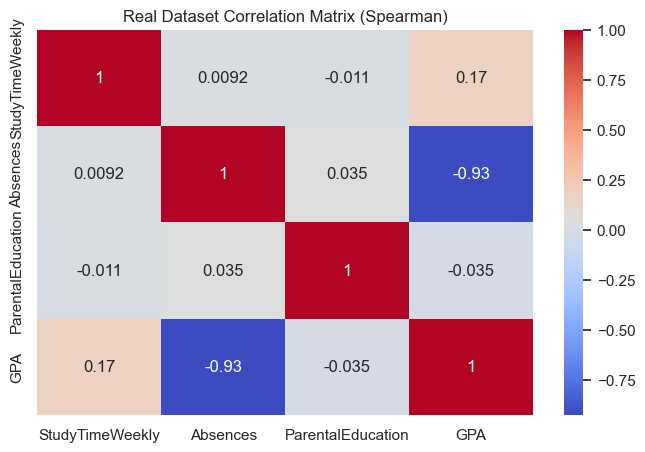

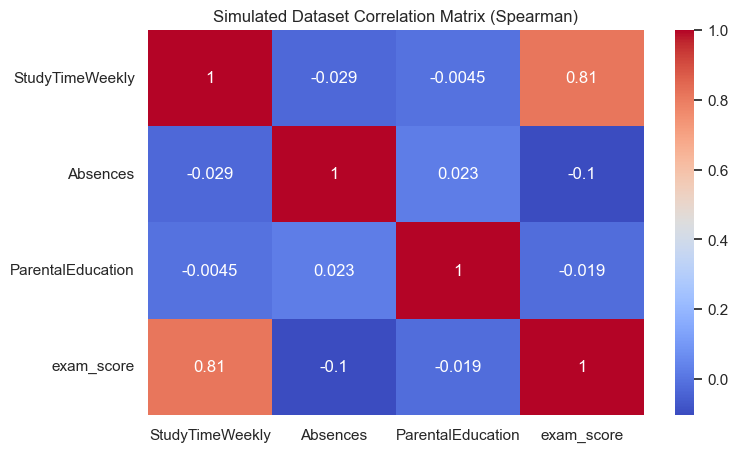

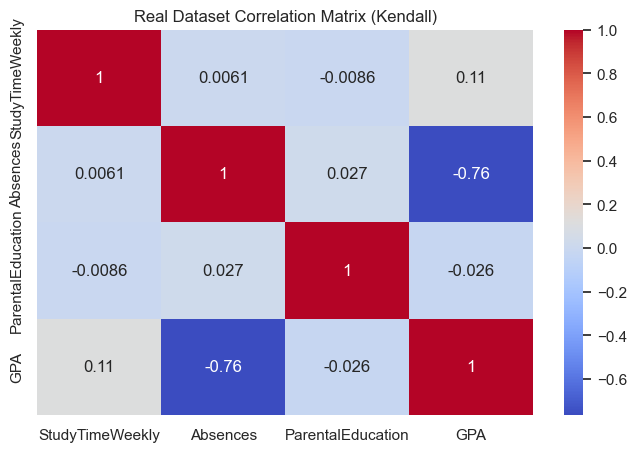

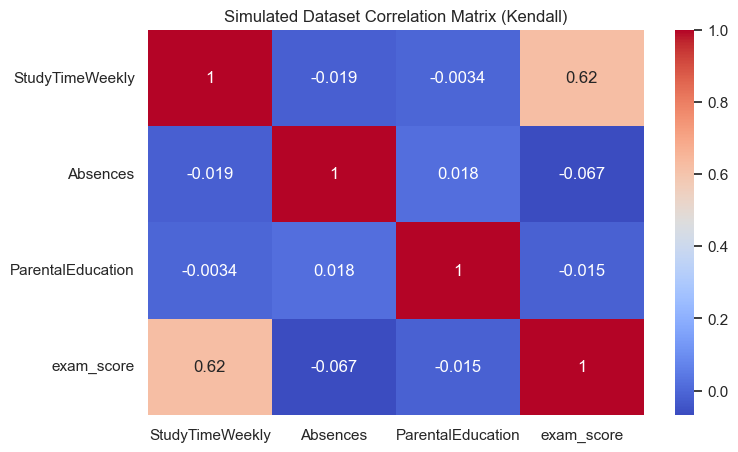

In [ ]:
# Select only numeric columns from both datasets
real_numeric = real.select_dtypes(include='number')
sim_numeric = sim.select_dtypes(include='number')

# Function to create a heatmap for a given correlation method
def plot_corr_heatmap(data, method, dataset_name):
    plt.figure(figsize=(8, 5))
    sns.heatmap(data.corr(method=method), annot=True, cmap='coolwarm')
    plt.title(f"{dataset_name} Dataset Correlation Matrix ({method.capitalize()})")
    plt.show()

# Spearman (exploration only)
plot_corr_heatmap(real_numeric, 'spearman', 'Real')
plot_corr_heatmap(sim_numeric, 'spearman', 'Simulated')

# Kendall (exploration only)
plot_corr_heatmap(real_numeric, 'kendall', 'Real')
plot_corr_heatmap(sim_numeric, 'kendall', 'Simulated')